## Importing Libries

In [12]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
%matplotlib Inline

# Descriptive Statistics
## 1. Reading data from CSV

In [13]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [15]:
df.shape

(1000, 8)

## 2. Missing values

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
# showing columns name
for col in df:
  print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


## 3. replace shace in column name to _

In [18]:
df.columns = [col.title().replace(' ','_') for col in df.columns]

for col in df.columns:
  print(col)


Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


# Graph Representation

# univariate Visualization
## 1.1 Quantitive  features
### 1.1.1 histogram plot math,reading,writing scores

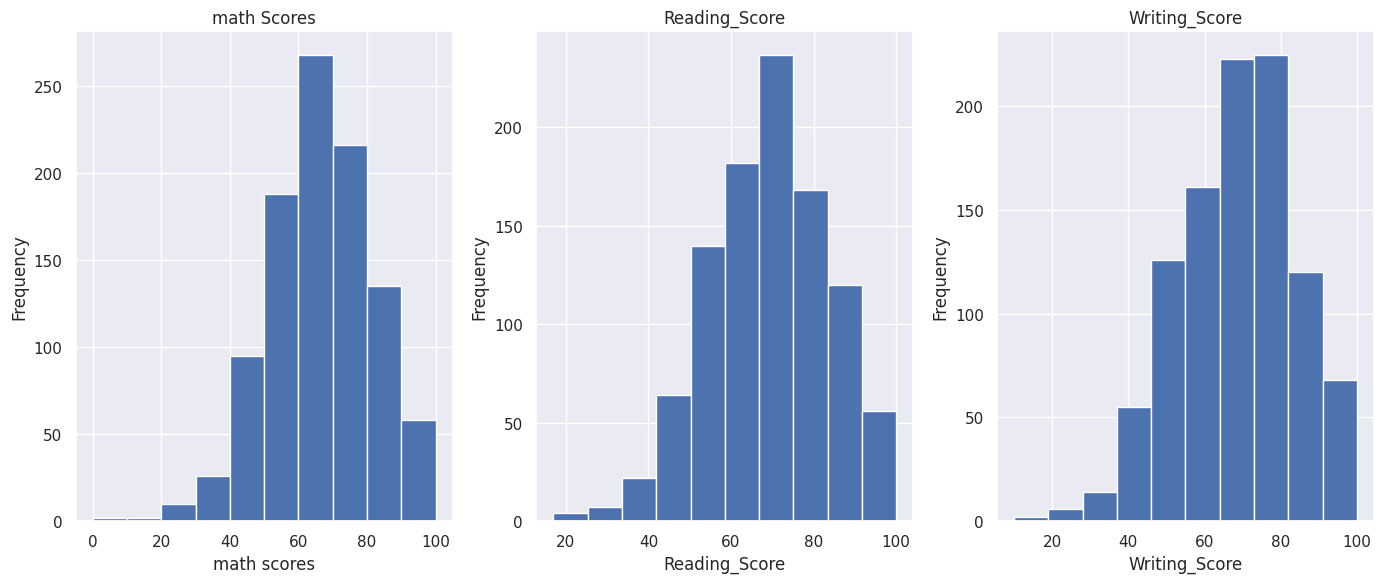

In [24]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
df['Math_Score'].plot(kind='hist')
plt.title('math Scores')
plt.xlabel('math scores')
plt.tight_layout()

plt.subplot(1,3,2)
df['Reading_Score'].plot(kind='hist')
plt.title('Reading_Score')
plt.xlabel('Reading_Score')
plt.tight_layout()

plt.subplot(1,3,3)
df['Writing_Score'].plot(kind='hist')
plt.title('Writing_Score')
plt.xlabel('Writing_Score')
plt.tight_layout()

### 1.1.2 box plot math,reading,writing scores

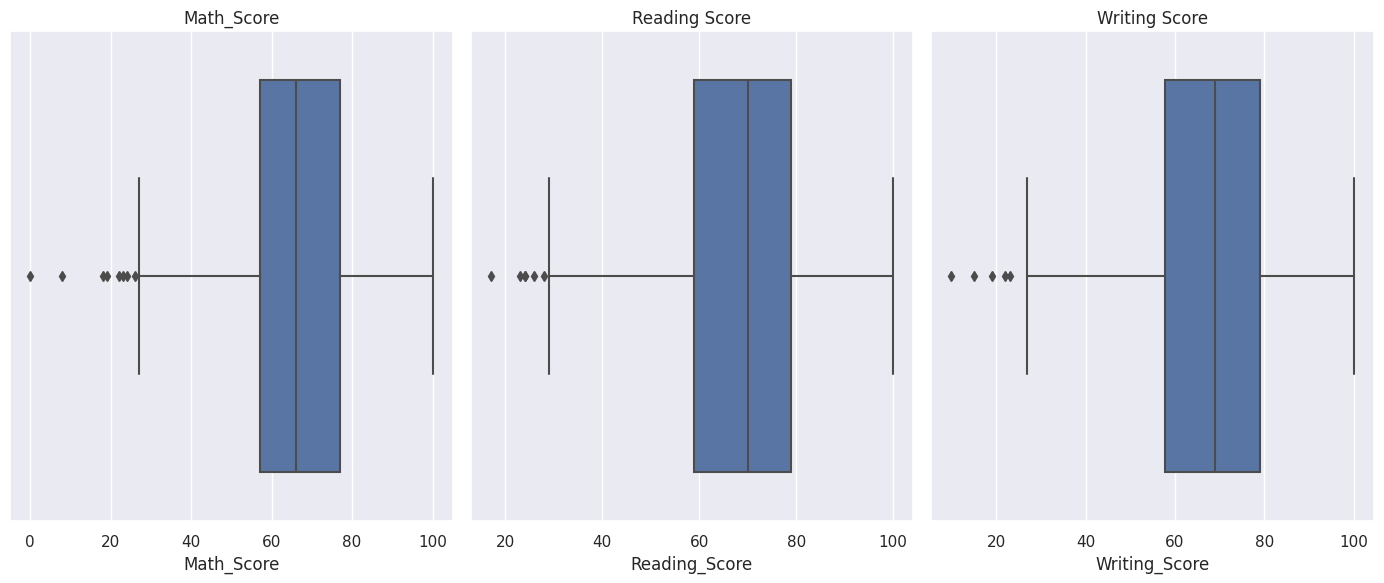

In [32]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(data= df ,x ='Math_Score')
plt.title('Math_Score')
plt.tight_layout()

plt.subplot(1,3,2)
sns.boxplot(data= df ,x ='Reading_Score')
plt.title('Reading Score')
plt.tight_layout()

plt.subplot(1,3,3)
sns.boxplot(data= df ,x ='Writing_Score')
plt.title('Writing Score')
plt.tight_layout()

# gender performance of student above 80 %

In [52]:
math_filtered_scores = df.query('Math_Score > 80')
reading_filtered_scores = df.query('Reading_Score > 80')
writing_filtered_scores = df.query('Writing_Score > 80')

math_stat = math_filtered_scores.groupby('Gender')['Math_Score'].count()
read_stat = math_filtered_scores.groupby('Gender')['Reading_Score'].count()
write_stat = math_filtered_scores.groupby('Gender')['Writing_Score'].count()



Gender
female     68
male      108
Name: Writing_Score, dtype: int64

### 1.1.3 Pie chart math,reading,writing scores

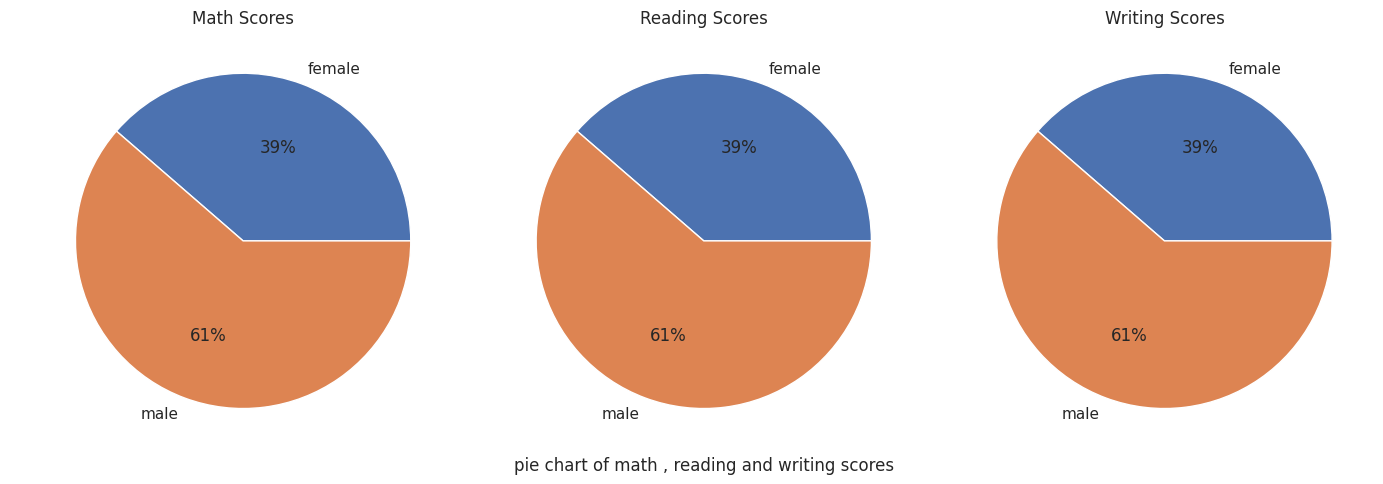

In [68]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
math_stat.plot(kind='pie',autopct="%.0f%%" ) # percentage form
plt.title('Math Scores')
plt.ylabel(" ")
plt.tight_layout()

plt.subplot(1,3,2)
read_stat.plot(kind='pie',autopct="%.0f%%" ) # percentage form
plt.title('Reading Scores')
plt.ylabel(" ")
plt.tight_layout()

plt.xlabel("pie chart of math , reading and writing scores")

plt.subplot(1,3,3)
write_stat.plot(kind='pie',autopct="%.0f%%" ) # percentage form
plt.title('Writing Scores')
plt.ylabel(" ")
plt.tight_layout()


## 1.2 Categorical / Binary features
### 1.2.1 frequency table for categorial variables

In [71]:
categorical_features = ['Gender','Race/Ethnicity','Parental_Level_Of_Education','Lunch','Test_Preparation_Course']

for col in categorical_features:
  print('-'*50)
  print(f'The column name is : {col}')
  print(df[col].value_counts())

--------------------------------------------------
The column name is : Gender
female    518
male      482
Name: Gender, dtype: int64
--------------------------------------------------
The column name is : Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
--------------------------------------------------
The column name is : Parental_Level_Of_Education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
--------------------------------------------------
The column name is : Lunch
standard        645
free/reduced    355
Name: Lunch, dtype: int64
--------------------------------------------------
The column name is : Test_Preparation_Course
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64


### 1.2.2 statistice for student ethnicity

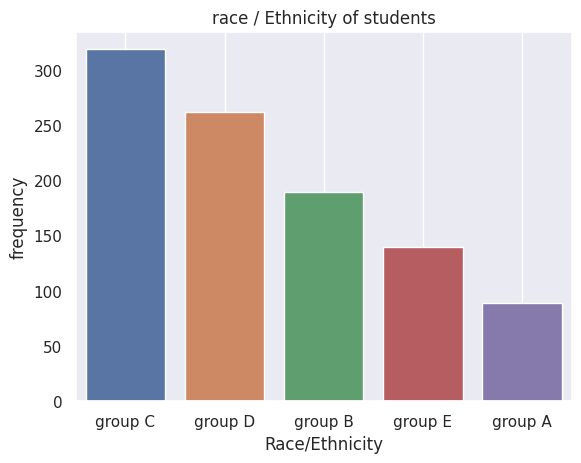

In [76]:
sns.barplot(x=df['Race/Ethnicity'].value_counts().index,
            y = df['Race/Ethnicity'].value_counts().values)

plt.xlabel('Race/Ethnicity')
plt.ylabel('frequency')
plt.title('race / Ethnicity of students')
plt.grid()

plt.show()

### 1.2.3 analysis of student race/Ethnicity pie chart

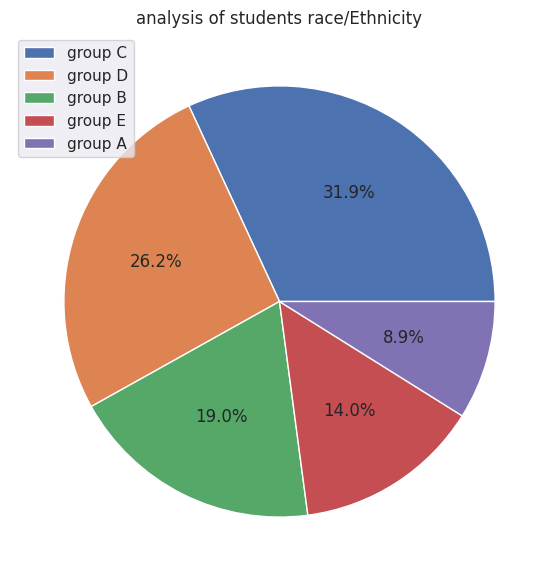

In [78]:
labels = df['Race/Ethnicity'].value_counts().index
values = df['Race/Ethnicity'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values, autopct='%1.1f%%')
plt.title("analysis of students race/Ethnicity")
plt.legend(labels, loc='best')
plt.show()

### 1.2.3 analysis of parents level of education

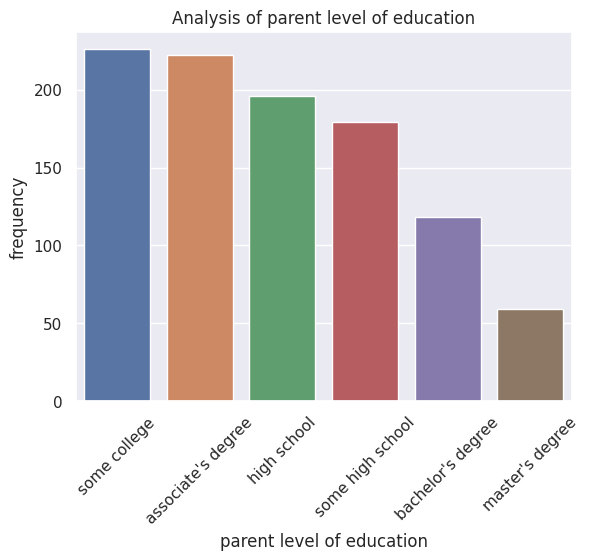

In [88]:
sns.barplot(x=df['Parental_Level_Of_Education'].value_counts().index,\
            y=df['Parental_Level_Of_Education'].value_counts().values )

plt.xticks(rotation=45)

plt.xlabel('parent level of education')
plt.ylabel('frequency')
plt.title("Analysis of parent level of education")
plt.show()

# Multivariate visualization
## 1.1 correlation matrix

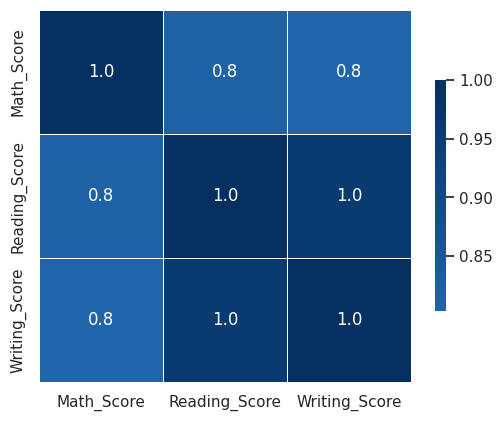

In [95]:
fig = plt.figure(figsize=(6,6))
corr = df.corr()
warnings.filterwarnings("ignore", category=FutureWarning)
sns.heatmap(corr,annot=True,fmt='.1f',square=True,center=0,linewidth=.5,cmap="RdBu",cbar_kws={"shrink":.5});

## reading vs writing scattered plot

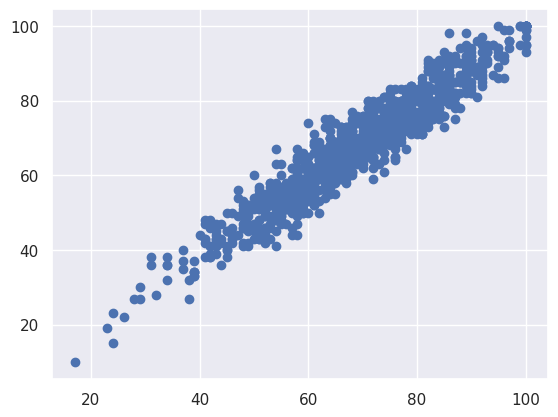

In [96]:
plt.scatter(df['Reading_Score'],df['Writing_Score'])

## gender statistics of the class population

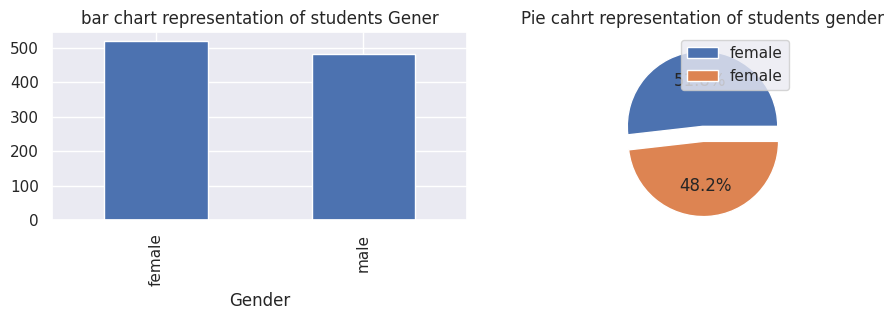

In [98]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

gender = df['Gender'].value_counts()
gender.plot(kind='bar',ax=ax1,x='Gender',title = "bar chart representation of students Gener")
ax1.set_xlabel('Gender')

explode = [0,0.2]
ax2.pie(gender,autopct='%1.1f%%',explode=explode)
ax2.set_title("Pie cahrt representation of students gender")
ax2.legend(df['Gender'],loc="upper right")

plt.tight_layout(pad=3.0)

## statistics that attended the test preparation course

Text(0, 0.5, '')

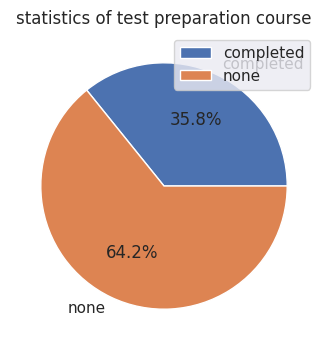

In [101]:
fig ,ax = plt.subplots(figsize=(10,4))

state2 = df['Test_Preparation_Course'].unique()
state2.sort()
df.groupby('Test_Preparation_Course').size().plot(kind='pie',autopct='%1.1f%%',title="statistics of test preparation course")

ax.legend(state2,loc='best')
ax.set_ylabel('')

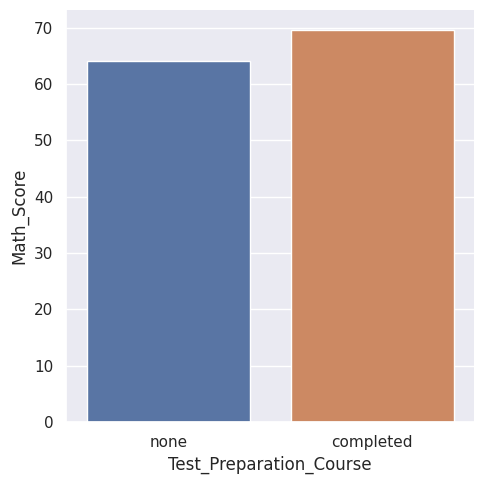

In [106]:
plt.Figure(figsize=(6,4))

sns.catplot(data=df,y='Math_Score',x='Test_Preparation_Course',kind='bar',ci=None)